In [91]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime as dt
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# importing Disney stock history, Jan. 4, 2010 to July 13, 2020
dis = pd.read_csv('dis.csv',parse_dates=['Date'])
dis

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,32.500000,32.750000,31.870001,32.070000,27.933924,13700400
1,2010-01-05,32.070000,32.160000,31.700001,31.990000,27.864237,10307700
2,2010-01-06,31.900000,32.000000,31.680000,31.820000,27.716166,10709500
3,2010-01-07,31.770000,31.860001,31.540001,31.830000,27.724878,8202100
4,2010-01-08,31.660000,31.940001,31.530001,31.879999,27.768419,7657500
...,...,...,...,...,...,...,...
2644,2020-07-07,113.629997,115.080002,112.610001,113.629997,113.629997,10836500
2645,2020-07-08,113.480003,117.129997,112.809998,116.660004,116.660004,13629500
2646,2020-07-09,116.510002,117.849998,115.379997,116.809998,116.809998,13582900
2647,2020-07-10,116.830002,119.440002,116.209999,119.339996,119.339996,14207900


In [4]:
# compiling Disney releases, including Marvel Studios
releases = pd.DataFrame()
decades = ['2010','2020']
for d in decades:
    releases_dec = pd.read_csv(f'disney_{d}.csv',names=['Type','Title','US_Release','Production_Companies'],header=0,
                              usecols=['Title','US_Release','Production_Companies'],parse_dates=['US_Release'])
    releases = pd.concat([releases,releases_dec],ignore_index=True)
marvel = pd.read_csv('marvel.csv',names=['Title','US_Release','Production_Companies'],header=0,parse_dates=['US_Release'])
releases = pd.concat([releases,marvel],ignore_index=True)
# print(releases.US_Release[0])
# datetime.datetime.strptime(releases.US_Release,'%d-%b-%y')
# releases['US_Release'] = releases['US_Release'].astype('datetime64[D]')
releases.sort_values('US_Release',inplace=True,ignore_index=True)
releases

,Title,US_Release,Production_Companies
0,Alice in Wonderland,2010-03-05,"The Zanuck Company, Roth Films and Team Todd"
1,Waking Sleeping Beauty,2010-03-26,Stone Circle Pictures
2,Oceans,2010-04-22,Participant Media
3,Iron Man 2,2010-05-07,Marvel Studios
4,Prince of Persia: The Sands of Time,2010-05-28,Jerry Bruckheimer Films
...,...,...,...
113,Stargirl,2020-03-13,Gotham Group and Hahnscape Entertainment
114,Elephant,2020-04-03,Disneynature
115,Dolphin Reef,2020-04-03,Disneynature
116,Artemis Fowl,2020-06-12,TriBeCa Productions and Marzano Films


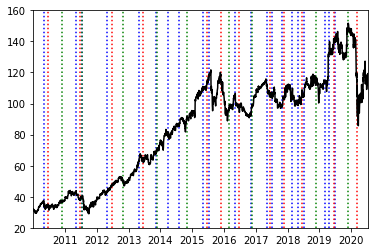

In [5]:
# plotting Disney stock price over the past decade, with vertical lines representing "major" Disney releases
# (Disney, Pixar, Marvel)
plt.plot(dis.Date,dis.Close,'k-')
plt.vlines(releases.loc[releases.Production_Companies=='Marvel Studios'].US_Release,20,160,linestyles='dotted',colors='b')
plt.vlines(releases.loc[releases.Production_Companies=='Pixar Animation Studios'].US_Release,20,160,
           linestyles='dotted',colors='r')
plt.vlines(releases.loc[releases.Production_Companies=='Walt Disney Animation Studios'].US_Release,20,160,
           linestyles='dotted',colors='g')
plt.axis([dis.Date.min(),dis.Date.max(),20,160])
plt.show()

In [6]:
# calculating days until major Disney release
def nearest(items, target):
    return min(items, key = lambda x: abs(x-target))
# dis['Disneyless_Days'] = [releases.loc[releases.US_Release>date].US_Release.iloc[0] - date for date in dis.Date]

dis['days_until'] = np.nan
dis['days_since'] = np.nan
for ind in dis.index:
    try:
        until = releases.loc[releases.US_Release > dis.loc[ind,'Date']].US_Release.iloc[0] - dis.loc[ind,'Date']
        until = until.days
        dis.loc[ind,'days_until'] = until
    except:
        pass
    try:
        since = dis.loc[ind,'Date'] - releases.loc[releases.US_Release < dis.loc[ind,'Date']].US_Release.iloc[-1]
        since = since.days
        dis.loc[ind,'days_since'] = since
    except:
        pass

In [7]:
dis

,Date,Open,High,Low,Close,Adj Close,Volume,days_until,days_since
0,2010-01-04,32.500000,32.750000,31.870001,32.070000,27.933924,13700400,60.0,NaN
1,2010-01-05,32.070000,32.160000,31.700001,31.990000,27.864237,10307700,59.0,NaN
2,2010-01-06,31.900000,32.000000,31.680000,31.820000,27.716166,10709500,58.0,NaN
3,2010-01-07,31.770000,31.860001,31.540001,31.830000,27.724878,8202100,57.0,NaN
4,2010-01-08,31.660000,31.940001,31.530001,31.879999,27.768419,7657500,56.0,NaN
...,...,...,...,...,...,...,...,...,...
2644,2020-07-07,113.629997,115.080002,112.610001,113.629997,113.629997,10836500,NaN,4.0
2645,2020-07-08,113.480003,117.129997,112.809998,116.660004,116.660004,13629500,NaN,5.0
2646,2020-07-09,116.510002,117.849998,115.379997,116.809998,116.809998,13582900,NaN,6.0
2647,2020-07-10,116.830002,119.440002,116.209999,119.339996,119.339996,14207900,NaN,7.0


In [80]:
# defining dataset independent & dependent variables
try:
    dis['Date'] = dis['Date'].map(dt.datetime.toordinal)
except:
    pass
# dataset = dis.loc[dis.days_until<=7].loc[dis.days_since<=7]
dataset = dis
x = dataset.dropna().drop(['Close','Adj Close'],axis=1)
y = dataset.dropna()['Close']
print(len(x),len(y))

2600 2600


In [81]:
# train/test split and converting dates into numerical values
# x_train, x_test, y_train, y_test = train_test_split(dataset,valid,test_size=0.2)
split = int(len(x)*0.8)
x_train = x.iloc[:split]
y_train = y.iloc[:split]
x_test = x.iloc[split:]
y_test = y.iloc[split:]

In [82]:
# creating and fitting model
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [83]:
predictions = lm.predict(x_test)
predictions

array([104.43297895, 104.5155316 , 106.44887509, 108.79634665,
       108.88296124, 106.96801851, 106.62274495, 106.79498014,
       106.2694862 , 106.40745573, 104.38062318, 104.20961262,
       104.7982112 , 104.64610517, 105.2686442 , 104.88013191,
       104.1687022 , 105.16392381, 104.5496704 , 105.60892609,
       105.42950273, 108.43338492, 108.74381824, 109.47105208,
       109.51232185, 111.95012109, 110.38009136, 113.79019126,
       111.19105476, 110.62070872, 110.89835503, 110.48077548,
       113.66419811, 112.49665957, 112.94805284, 113.551164  ,
       112.97015132, 112.51276783, 113.308636  , 115.98389958,
       117.34816927, 114.82692999, 113.71574068, 112.87212447,
       112.09296018, 112.67810801, 112.37739426, 112.64492649,
       112.30855092, 112.21920653, 112.63051923, 112.29447103,
       111.77187386, 112.30496239, 112.47230273, 112.44767668,
       112.25691546, 111.96978257, 111.92379755, 111.09558408,
       110.10098658, 109.82826806, 110.99752574, 111.00

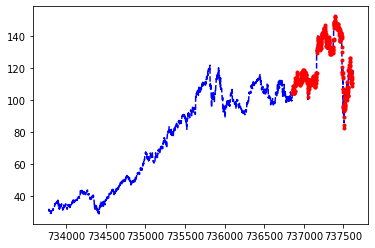

Score: 0.9966068321326014


In [89]:
plt.plot(dis.Date,dis.Close,'b--')
plt.plot(x_test.Date,predictions,'r.')
plt.show()
print('Score:',model.score(x_test,y_test))